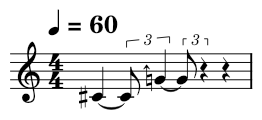

In [1]:
from maelzel.core import *

v2 = Voice(["4C#~:1", 
            "4C#:1/3",
            "4G+25:3/3",
           ])
# v2.show(backend='lilypond')
v2.show(backend='musicxml')


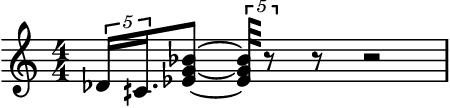

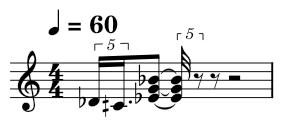

In [2]:
from maelzel.core import *
cfg = getWorkspace().config
cfg['quant.nestedTuplets'] = None
v2 = Voice(["4C#:1/5", 
            "4C+:3/10", 
            "4Eb,4G,4Bb!:3/5", 
           ])
v2

v2.show(backend='lilypond')
v2.show(backend='musicxml')
v2.write("~/tmp/2.musicxml")

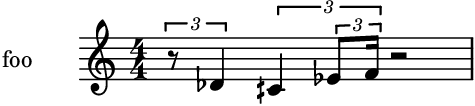

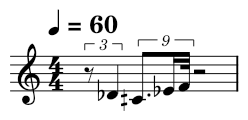

In [4]:
from maelzel.core import *
v1 = Voice(["4C#:2/3:offset=1/3", 
            "4C+:2/3", 
            "4Eb:2/9", 
            "4F:1/9",
            ], name='foo')

cfg = getWorkspace().config
    
cfg['quant.nestedTuplets'] = None
v1.show(backend='lilypond')
v1.show(backend='musicxml')



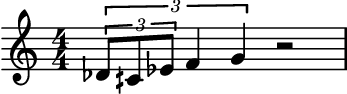

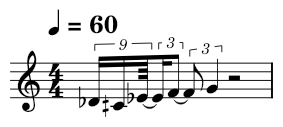

In [5]:
v3 = Voice(["4C#:2/9", 
            "4C+:2/9", 
            "4Eb:2/9", 
            "4F:2/3",
            "4G:2/3"
            ])
v3.show()
v3.show(backend='musicxml')


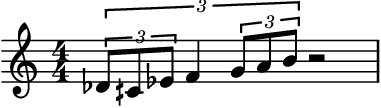

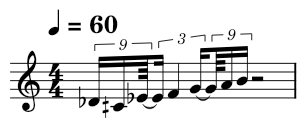

In [6]:
v4 = Voice(["4C#:2/9", 
            "4C+:2/9", 
            "4Eb:2/9", 
            "4F:2/3",
            "4G:2/9",
            "4A:2/9",
            "4B:2/9",
            
            ])
v4.show()
v4.show(backend='musicxml')


## Dynamics

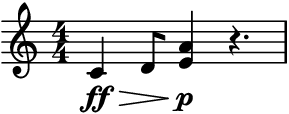

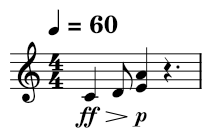

In [7]:
from maelzel.core import *
from maelzel.scoring import rendermusicxml

v = Voice([
    Note("4C", 1, dynamic='ff').addSpanner(">"),
    Note("4D", 0.5),
    Chord(("4E", "4A"), 1, dynamic='p')
])
v.show()
v.show(backend='musicxml')

## Spanners

### slurs

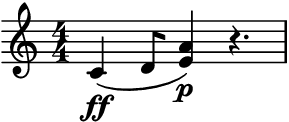

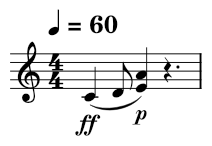

In [8]:
from maelzel.core import *
from maelzel.scoring import rendermusicxml

v = Voice([
    Note("4C", 1, dynamic='ff'),
    Note("4D", 0.5),
    Chord(("4E", "4A"), 1, dynamic='p')
])
v[0].addSpanner('slur', v[2])
v.show()
v.show(backend='musicxml')

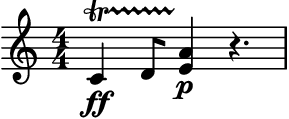

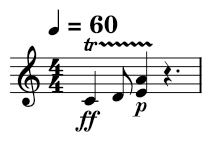

In [9]:
from maelzel.core import *

v = Voice([
    Note("4C", 1, dynamic='ff'),
    Note("4D", 0.5),
    Chord(("4E", "4A"), 1, dynamic='p')
])
v[0].addSpanner('trill', v[2])
v.show()
v.show(backend='musicxml')
v.write('~/tmp/trill.musicxml')

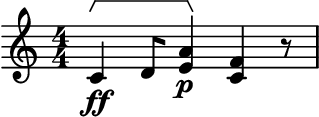

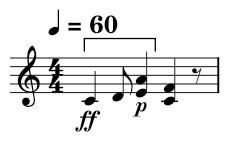

In [10]:
from maelzel.core import *

v = Voice([
    Note("4C", 1, dynamic='ff'),
    Note("4D", 0.5),
    Chord(("4E", "4A"), 1, dynamic='p'),
    Chord(("4C", "4F"), 1, dynamic='p'),
    
])
v[0].addSpanner('bracket', v[2])
v.show()
v.show(backend='musicxml')
v.write('~/tmp/bracket.musicxml')

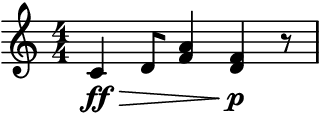

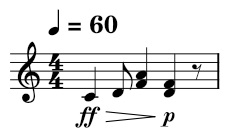

In [11]:
from maelzel.core import *

v = Voice([
    Note("4C", 1, dynamic='ff'),
    Note("4D", 0.5),
    Chord(("4F", "4A"), 1),
    Chord(("4D", "4F"), 1, dynamic='p'),
    
])
v[0].addSpanner(symbols.Hairpin('>'), v[3])
v.show()
v.show(backend='musicxml')
v.write('~/tmp/linespan.musicxml')

## Gracenotes

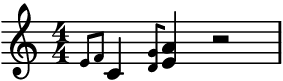

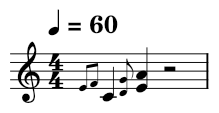

In [12]:
from maelzel.core import *
from maelzel.scoring import rendermusicxml

v = Voice([
    Note("4E", 0),
    Note("4F", 0),
    Note("4C", 1),
    Chord("4D,4G", 0),
    
    Chord(("4E", "4A"), 1)
])
v.show()
v.show(backend='musicxml')

## Glissando

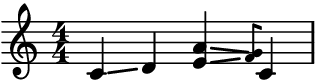

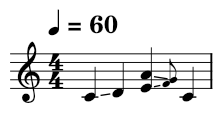

In [13]:
from maelzel.core import *
from maelzel.scoring import rendermusicxml

v = Voice([
    Note("4C", 1, gliss=True),
    Note("4D", 1),
    Chord(("4E", "4A"), 1, gliss=('4F', '4G')),
    Note("4C", 1)
])
v.show()
v.show(backend='musicxml')

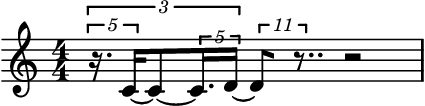

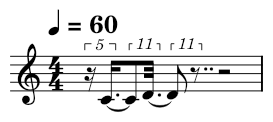

In [15]:
from maelzel.core import *

v = Voice([
    Rest("1/5"),
    Note("4C:2/3"),
    Note("4D", 0.5),
])

v.show()
v.show(backend='musicxml')


## Articulations

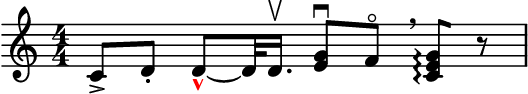

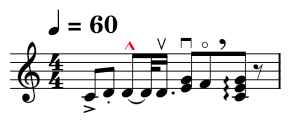

In [16]:
from maelzel.core import *
from maelzel.scoring import rendermusicxml
from maelzel.core import symbols

v = Voice([
    Note("4C", 0.5).addSymbol(articulation='accent'),
    Note("4D", 0.5).addSymbol(articulation='staccato'),
    Note("4D", 5/8).addSymbol(symbols.Articulation('marcato', color='#ff0000')),
    Note("4D", 3/8).addSymbol('upbow'),
    Chord("4E,4G", 0.5).addSymbol('downbow'),
    Note("4F", 0.5).addSymbol(articulation='flageolet'),
    Chord("4C,4E,4G", 0.5).addSymbol(articulation='arpeggio').addSymbol(symbols.Breath())
])
v.show()
v.show(backend='musicxml')


## Text

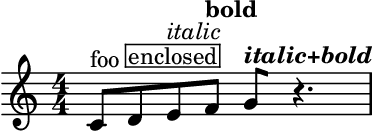

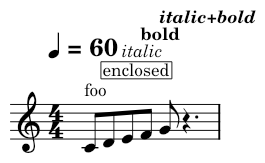

In [17]:
from maelzel.core import *
from maelzel.scoring import rendermusicxml
from maelzel.core import symbols

v = Voice([
    Note("4C", 0.5).addText('foo', placement='above'),
    Note("4D", 0.5).addText('enclosed', box='rectangle'),
    Note("4E", 0.5).addText('italic', italic=True),
    Note("4F", 0.5).addText('bold', weight='bold'),
    Note("4G", 0.5).addText('italic+bold', italic=True, weight='bold'),
    
    
    
    
])
v.show(backend='lilypond')
v.show(backend='musicxml')


## Score Structure

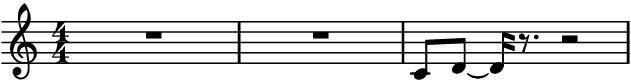

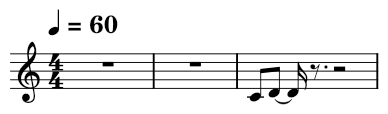

In [18]:
from maelzel.core import *
from maelzel.scoring import rendermusicxml
from maelzel.core import symbols

struct = ScoreStruct(r'''
3/4, 72, label=my label, barline=double
7/8, barline=dashed
5/16, rehearsalmark=A
3/8
7/8
4/4
''')

v = Voice([
    "4C:0.5:offset=8",
    "4D:0.75"
])
  
score = Score(voices=[v], scorestruct=struct)
score.show(backend='lilypond')
score.show(backend='musicxml')

## Noteheads

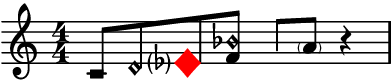

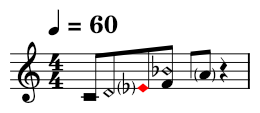

In [19]:
from maelzel.core import *

v = Voice([
    Note("4C:0.5").addSymbol(notehead='square'),
    Note("4D:0.5").addSymbol(notehead='harmonic'),
    Note("4Eb:0.5").addSymbol(symbols.Notehead('rhombus', color='red', size=2)).addSymbol(symbols.Accidental(parenthesis=True)),
    Note("4F:0.5").addSymbol(symbols.Harmonic('4th')),
    Note("4G:0.5").addSymbol(symbols.Notehead(hidden=True)),
    Note("4A:0.5").addSymbol(symbols.Notehead(parenthesis=True)),

])

v.show()
v.show(backend='musicxml')


## Tremolos

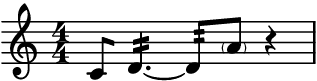

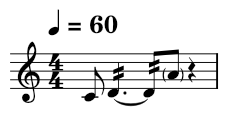

In [20]:
from maelzel.core import *

v = Voice([
    Note("4C:0.5"),
    Note("4D:2").addSymbol(symbols.Tremolo(nummarks=2, relative=False)),
    Note("4A:0.5").addSymbol(symbols.Notehead(parenthesis=True)),

])

v.show()
v.show(backend='musicxml')
v.write('~/tmp/trem.musicxml')


## Render via musicxml

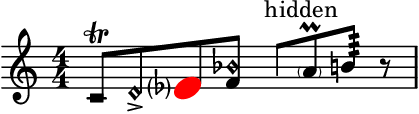

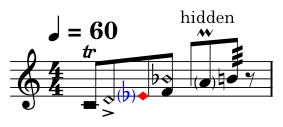

In [21]:
from maelzel.core import *
from maelzel.scoring import rendermusicxml
from maelzel.core import symbols

v = Voice([
    Note("4C:0.5").addSymbol(notehead='square').addSymbol(symbols.Ornament('trill')),
    Note("4D:0.5").addSymbol(notehead='harmonic').addSymbol('>'),
    Note("4Eb:0.5").addSymbol(symbols.Notehead('rhombus', color='#FF0000', size=2)).addSymbol(symbols.Accidental(parenthesis=True, color='blue')),
    Note("4F:0.5").addSymbol(symbols.Harmonic('4th')),
    Note("4G:0.5").addSymbol(symbols.Notehead(hidden=True)).addText("hidden"),
    Note("4A:0.5").addSymbol(symbols.Notehead(parenthesis=True)).addSymbol(symbols.Ornament('prall')),
    Note("4B:0.5").addSymbol(symbols.Tremolo(nummarks=3))
])

v.show()
v.show(backend='musicxml')
v.write('~/tmp/test.musicxml')



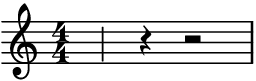

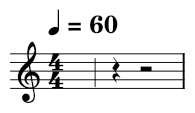

In [22]:
n = Note("4E").addSymbol(symbols.Notehead(hidden=True))
n.show(backend='lilypond')
n.show(backend='musicxml')
n.write('~/tmp/hidden-notehead.musicxml')